In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
mag_lisa = pd.read_csv('./magazine/final/mag_lisa_adfn.csv', sep='|', encoding = 'utf-8')

In [4]:
mag_lisa

,magazine,brand,category,title,link,date,contents,title_brand,word_lisa,ADFN
0,Allure,L,CELEBRITY,"블랙핑크 리사, 매일 아침 옷을 고르는 기준은? 화보 촬영 비하인드 & QNA 인터뷰",http://www.allurekorea.com/2020/06/02/132119/,2020/06/02/,"['얼루어 커버화보 촬영장에서 만난 블랙핑크 리사', '“안녕하세요 얼루어, 리사입...",1,"얼루어 커버화보 촬영장에서 만난 BLACKPINK 리사, 안녕하세요 얼루어, 리사입...","['얼루어', '커버', '화보', '촬영장', '만난', '리사', '안녕하세요'..."
1,Allure,L,CELEBRITY,LISA LOVES / 블랙핑크 리사,http://www.allurekorea.com/2020/05/26/lisa-lov...,2020/05/26/,"['자기 자신을 온전히 사랑할 줄 아는 리사가 한꺼번에 웃을 때, 덩달아 웃었다.'...",1,"자기 자신을 온전히 사랑할 줄 아는 리사가 한꺼번에 웃을 때, 덩달아 웃었다., 당...","['사랑', '줄', '리사', '번', '웃', '덩달아', '기억', '좋은',..."
2,Allure,L,BEAUTY,3억뷰 돌파 블랙핑크 뮤비 메이크업의 비밀은? 담당 메이크업 아티스트 직접 등판!,http://www.allurekorea.com/2020/07/19/3%ec%96%...,2020/07/19/,"['Q. 가장 마음에 들었던 메이크업 룩은?', '리사씨가 골목에서 등장하는 단독 ...",0,"Q. 가장 마음에 들었던 메이크업 룩은?, 리사씨가 골목에서 등장하는 단독 랩파트!...","['Q', '마음', '메이크업', '룩', '리사', '골목', '등장', '단독..."
3,B,L,CELEBRITY,"뒷광고 말고, 셀럽들의 앞광고",https://www.harpersbazaar.co.kr/article/48627,2020.09.03,"['협찬 태그는 이렇게, 리사!', ' 셀린의 뮤즈인 리사.', '그녀는 노란 니트...",0,"협찬 태그는 이렇게, 리사!, CELINE의 뮤즈인 리사., 그녀는 노란 니트 톱...","['협찬', '태그', '리사', 'CELINE', '뮤즈', '리사', '그녀',..."
4,B,L,CELEBRITY,"난리 난 블랙핑크의 네일아트, 왜?",https://www.harpersbazaar.co.kr/article/47719,2020.07.17,"['강렬한 레드 헤어와 시크한 네일을 선보인 리사.', ' 긴 손톱의 끝을 일자로 ...",0,"강렬한 레드 헤어와 시크한 네일을 선보인 리사., 긴 손톱의 끝을 일자로 다듬은 ...","['강렬한', '레드', '헤어', '시크', '네일', '리사', '손톱', '끝..."
...,...,...,...,...,...,...,...,...,...,...
153,W,L,"FASHION, 뉴스",밀라노로 떠난 리사,http://www.wkorea.com/2020/02/18/%eb%b0%80%eb%...,2020-02-18,"['밀란 패션위크 참석차 출국한 리사의 공항 룩.', '블랙핑크 리사가 오늘 2월 ...",1,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', '리..."
154,W,L,"FASHION, FEATURE",리사의 새로운 행보,http://www.wkorea.com/2020/02/13/%eb%a6%ac%ec%...,2020-02-13,"['', '', '리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 ...",1,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', 'YG', '엔터테인먼트', '리사'..."
155,W,L,W HOT ISSUE,"블랙핑크X세레나 고메즈 영상통화, 협업 티징",http://www.wkorea.com/2020/08/24/%eb%b8%94%eb%...,2020-08-24,"['서로의 팬임을 인증한 두 스타', '8월 28일 블랙핑크와 세레나 고메즈가 함께...",1,"서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '스타', '세레나', '고메즈', '컬래버레이션..."
156,W,L,W HOT ISSUE,블랙핑크가 아이스크림 셀카를 올린 이유는?,http://www.wkorea.com/2020/07/20/%eb%b8%94%eb%...,2020-07-20,"['‘내셔널 아이스크림 데이’를 기념한 블랙핑크의 귀여운 포스팅.', '제니와 리사...",1,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', '귀여운', '포스팅', '리사..."


In [5]:
mag_lisa['ADFN_2'] = mag_lisa['ADFN']

In [7]:
for word in mag_lisa['word_lisa']:
    if '걸' in word:
        print(word)
        print('-'*50)

자기 자신을 온전히 사랑할 줄 아는 리사가 한꺼번에 웃을 때, 덩달아 웃었다., 당신은 기억력이 좋은 편인가요?, 네, 사소한 것도 잘 기억하는 편이에요., 무언가를 기억한다는 건 다양한 감각을 동원하는 일이죠. 주로 어떤 감각을 사용하는 것 같아요?, 저는 대부분 눈으로 본 것을 더 잘 기억하는 편인 거 같아요. 후각이나 청각 같은 다른 감각은 그땐 선명해도 시간이 좀 지나면 금세 잊히는 것 같아요., 역사적으로 더웠던 2018년 여름과 좀 미지근하게 추웠던 2019년 겨울에 만났죠. 봄과 여름이 겹쳐진 2020년에 또 보내요. 그날 기억나요?, 네, 둘 다 기억나요. 특히 여름에 만났을 땐 에어컨도 잘 안 되는 이층집에서 로제랑 함께했잖아요. 엄청 더웠던 기억이 나요. 안 좋은 기억은 아니에요. 둘이 함께해서 그런지 오히려 재미있고 행복한 순간으로 기억해요., 그날의 대화를 다시 들춰봤어요. 웃고 떠들면서 장난처럼 한 말 중에 지나고 보니 현실이 된 게 많아요. 마치 알라딘의 요술램프처럼요. 요즘은 어때요? 소원을 빌어요?, 원래 소원은 함부로 빌면 안 된다고 들었어요. 아껴서 빌어야 된다고 해서 정말 중요한 일을 하기 전에 빌어요. 특히 무대에 오르거나 공연할 때 제발 틀리지 않고, 모두가 다치지 않게 해달라고 빌어요., 여전히 필름 카메라를 들고 왔네요. 마지막에 본 게 콘탁스 T2였는데 오늘의 카메라는 뭐예요?, 아직 콘탁스의 매력에 빠져 있어요. 오늘 가지고 온 카메라는 얼마 전에 산 T3 모델이에요. 역시 모든 결과물이 다 마음에 들어요., 풍경보다는 사람을 찍는 게 더 재미있다고 말했어요. 올봄 자신의 얼굴과 BLACKPINK 멤버들의 얼굴이 가득 담긴 사진집도 냈죠.xa0, 함께 있는 시간이 가장 많다 보니 자연스럽게 멤버들 사진을 많이 찍었어요. 투어를 가거나 스케줄을 가더라도 그날그날의 다양한 모습들을 담다 보니 어느새 꽤 많이 쌓였더라고요., 오늘 같은 화보도 그렇고 사진을 엮을 때 셀렉트’가 참 중요하잖아요. 사진가 리사의 셀렉트 기준은

TypeError: argument of type 'float' is not iterable

In [8]:
mag_lisa['ADFN'][0][0]

'['

In [9]:
for word in mag_lisa['ADFN_2']:
    if "톱" in word:
        print(word)
        print('-'*50)

['협찬', '태그', '리사', 'CELINE', '뮤즈', '리사', '그녀', '노란', '니트', '톱', '청', '스커트', '다양한', '포즈', '취한', 'SNS', '업로드', '미니', '백', '그녀', '눈길', '끈', '협찬', '글자', '해시태그', '정직하게', '표기', '움']
--------------------------------------------------
['강렬한', '레드', '헤어', '시크', '네일', '리사', '손톱', '끝', '일자', '발레리나', '쉐입', '보랏빛', '그레이', '컬러', '베이스', '칠한', '뒤', '손톱', '끝', '부분', '화이트', '컬러', '사용', '모양', '반면', '뮤직비디오', '리사', '네일', '여름', '비비드', '컬러', '택했다', '손가락', '컬러', '디자인', '세련된', '형태', '옐로', '핑크', '퍼플', '채', '컬러', '중심', '다양한', '패턴', '조합', '사용', '올여름', '네온', '네일', '염두', '있다면', '리사', '손', '컬러', '정도', '무채색', '계열', '사용', '컬러', '밸런스']
--------------------------------------------------
['시어', '소재', '아가', '패턴', '블라우스', '레터', '링', '장식', '톱', '펑키', '무드', '액세서리', '레이어', '드해', '개성', '더한', '리사']
--------------------------------------------------
['JYP', '콘서트장', '선미', '오늘', '그녀', '드레스', '코드', '별', '밤', '레드', '푸시', '골드', '스타', '영롱하게', '스팽글', '미니', '드레스', '화려함을', '마음껏', '평소', '투', '박한', '플랫폼', '부츠', '매치', '트렌디', '마무리', '스쿨', '걸'

In [10]:
# 걸크러시
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'걸', '크러시", "걸크러시")
# 걸그룹
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'걸', '그룹'", "걸그룹")

In [11]:
# 글로우
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'글', '로우'", "글로우")

In [12]:
# 아우터
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'아우', '터'", "아우터")

In [13]:
# 데일리
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'데', '일리'", "데일리")

In [14]:
# 볼륨감
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'볼륨', '감'", "볼륨감")
# 존재감
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'존재', '감'", "존재감")
# 통일감
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].replace("'통일', '감'", "통일감")

In [15]:
# 스타일링
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace("'스타', '일링'", "스타일링")

In [16]:
# 캐주얼
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace("'캐', '주얼'", "캐주얼")

In [17]:
# FW / SS
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace("'F', 'W'", "FW")
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace("'S', 'S'", "SS")

In [18]:
# 스포티
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace("'스포', '티'", "스포티")

In [19]:
# 테일러 / 레이어
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace("'테일러', '드'", "테일러드")
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace("'레이어', '드'", "레이어드")

In [20]:
mag_lisa

,magazine,brand,category,title,link,date,contents,title_brand,word_lisa,ADFN,ADFN_2
0,Allure,L,CELEBRITY,"블랙핑크 리사, 매일 아침 옷을 고르는 기준은? 화보 촬영 비하인드 & QNA 인터뷰",http://www.allurekorea.com/2020/06/02/132119/,2020/06/02/,"['얼루어 커버화보 촬영장에서 만난 블랙핑크 리사', '“안녕하세요 얼루어, 리사입...",1,"얼루어 커버화보 촬영장에서 만난 BLACKPINK 리사, 안녕하세요 얼루어, 리사입...","['얼루어', '커버', '화보', '촬영장', '만난', '리사', '안녕하세요'...","['얼루어', '커버', '화보', '촬영장', '만난', '리사', '안녕하세요'..."
1,Allure,L,CELEBRITY,LISA LOVES / 블랙핑크 리사,http://www.allurekorea.com/2020/05/26/lisa-lov...,2020/05/26/,"['자기 자신을 온전히 사랑할 줄 아는 리사가 한꺼번에 웃을 때, 덩달아 웃었다.'...",1,"자기 자신을 온전히 사랑할 줄 아는 리사가 한꺼번에 웃을 때, 덩달아 웃었다., 당...","['사랑', '줄', '리사', '번', '웃', '덩달아', '기억', '좋은',...","['사랑', '줄', '리사', '번', '웃', '덩달아', '기억', '좋은',..."
2,Allure,L,BEAUTY,3억뷰 돌파 블랙핑크 뮤비 메이크업의 비밀은? 담당 메이크업 아티스트 직접 등판!,http://www.allurekorea.com/2020/07/19/3%ec%96%...,2020/07/19/,"['Q. 가장 마음에 들었던 메이크업 룩은?', '리사씨가 골목에서 등장하는 단독 ...",0,"Q. 가장 마음에 들었던 메이크업 룩은?, 리사씨가 골목에서 등장하는 단독 랩파트!...","['Q', '마음', '메이크업', '룩', '리사', '골목', '등장', '단독...","['Q', '마음', '메이크업', '룩', '리사', '골목', '등장', '단독..."
3,B,L,CELEBRITY,"뒷광고 말고, 셀럽들의 앞광고",https://www.harpersbazaar.co.kr/article/48627,2020.09.03,"['협찬 태그는 이렇게, 리사!', ' 셀린의 뮤즈인 리사.', '그녀는 노란 니트...",0,"협찬 태그는 이렇게, 리사!, CELINE의 뮤즈인 리사., 그녀는 노란 니트 톱...","['협찬', '태그', '리사', 'CELINE', '뮤즈', '리사', '그녀',...","['협찬', '태그', '리사', 'CELINE', '뮤즈', '리사', '그녀',..."
4,B,L,CELEBRITY,"난리 난 블랙핑크의 네일아트, 왜?",https://www.harpersbazaar.co.kr/article/47719,2020.07.17,"['강렬한 레드 헤어와 시크한 네일을 선보인 리사.', ' 긴 손톱의 끝을 일자로 ...",0,"강렬한 레드 헤어와 시크한 네일을 선보인 리사., 긴 손톱의 끝을 일자로 다듬은 ...","['강렬한', '레드', '헤어', '시크', '네일', '리사', '손톱', '끝...","['강렬한', '레드', '헤어', '시크', '네일', '리사', '손톱', '끝..."
...,...,...,...,...,...,...,...,...,...,...,...
153,W,L,"FASHION, 뉴스",밀라노로 떠난 리사,http://www.wkorea.com/2020/02/18/%eb%b0%80%eb%...,2020-02-18,"['밀란 패션위크 참석차 출국한 리사의 공항 룩.', '블랙핑크 리사가 오늘 2월 ...",1,"밀란 패션위크 참석차 출국한 리사의 공항 룩., BLACKPINK 리사가 오늘 2월...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', '리...","['밀란', '패션위크', '참석', '차', '출국', '리사', '공항', '리..."
154,W,L,"FASHION, FEATURE",리사의 새로운 행보,http://www.wkorea.com/2020/02/13/%eb%a6%ac%ec%...,2020-02-13,"['', '', '리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 ...",1,", , 리사의 패션 브랜드가 탄생할 것으로 보인다. YG엔터테인먼트가 2019년 ...","['리사', '패션', '브랜드', '탄생', 'YG', '엔터테인먼트', '리사'...","['리사', '패션', '브랜드', '탄생', 'YG', '엔터테인먼트', '리사'..."
155,W,L,W HOT ISSUE,"블랙핑크X세레나 고메즈 영상통화, 협업 티징",http://www.wkorea.com/2020/08/24/%eb%b8%94%eb%...,2020-08-24,"['서로의 팬임을 인증한 두 스타', '8월 28일 블랙핑크와 세레나 고메즈가 함께...",1,"서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...","['서로', '팬임', '인증', '스타', '세레나', '고메즈', '컬래버레이션...","['서로', '팬임', '인증', '스타', '세레나', '고메즈', '컬래버레이션..."
156,W,L,W HOT ISSUE,블랙핑크가 아이스크림 셀카를 올린 이유는?,http://www.wkorea.com/2020/07/20/%eb%b8%94%eb%...,2020-07-20,"['‘내셔널 아이스크림 데이’를 기념한 블랙핑크의 귀여운 포스팅.', '제니와 리사...",1,"내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...","['내셔널', '아이스크림', '데이', '기념', '귀여운', '포스팅', '리사...","['내셔널', '아이스크림', '데이', '기념', '귀여운', '포스팅', '리사..."


In [21]:
mag_lisa['ADFN_2'] = mag_lisa['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

In [22]:
noun_adj_list = []
for i in range(len(mag_lisa)):
    for word in mag_lisa.loc[i, 'ADFN_2']:
        noun_adj_list.append(word)

In [23]:
noun_adj_list

['얼루어',
 '커버',
 '화보',
 '촬영장',
 '만난',
 '리사',
 '안녕하세요',
 '얼루어',
 '리사',
 '반가워요',
 '볼',
 '없었던',
 '비하인드',
 '컷',
 '심쿵',
 '아이콘',
 '텍트',
 '그녀',
 '직접',
 '열',
 '가지',
 '키',
 '워드',
 '사랑',
 '줄',
 '리사',
 '번',
 '웃',
 '덩달아',
 '기억',
 '좋은',
 '편',
 '사소한',
 '기억',
 '편이',
 '무언가',
 '다양한',
 '감각',
 '동원',
 '일이',
 '주로',
 '감각',
 '사용',
 '대부분',
 '눈',
 '기억',
 '편',
 '거',
 '후각',
 '청각',
 '감각',
 '그땐',
 '선명해도',
 '금세',
 '역사',
 '더웠던',
 '여름',
 '미지근하게',
 '추웠던',
 '겨울',
 '봄',
 '여름',
 '겹',
 '그날',
 '여름',
 '땐',
 '에어컨',
 '층집',
 '더웠던',
 '기억',
 '좋은',
 '기억',
 '아니에요',
 '그런지',
 '재미있고',
 '행복한',
 '순간',
 '기억',
 '그날',
 '대화',
 '다시',
 '장난',
 '현실',
 '많아요',
 '알라딘',
 '요술',
 '램프',
 '처럼',
 '요즘',
 '어때요',
 '소원',
 '빌어',
 '원래',
 '소원',
 '함부로',
 '빌어',
 '중요한',
 '빌어',
 '무대',
 '공연',
 '제발',
 '빌어',
 '필름',
 '카메라',
 '마지막',
 '콘탁스',
 'T',
 '오늘',
 '카메라',
 '뭐',
 '콘탁스',
 '매력',
 '오늘',
 '가지',
 '온',
 '카메라',
 '산',
 'T',
 '모델',
 '역시',
 '모든',
 '결과물',
 '마음',
 '풍경',
 '사람',
 '재미있다고',
 '봄',
 '얼굴',
 '멤버',
 '얼굴',
 '가득',
 '집도',
 'xa',
 '많다',
 '자연',
 '멤버',
 '투어',
 '스케줄',
 '그날그날

In [24]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 460), ('패션', 133), ('블랙', 85), ('컬러', 83), ('룩', 75), ('컬렉션', 67), ('브랜드', 63), ('멤버', 62), ('CELINE', 62), ('참석', 55), ('매력', 52), ('프라다', 52), ('매치', 50), ('무대', 46), ('재킷', 46), ('화보', 44), ('걸', 44), ('공개', 44), ('포인트', 42), ('티셔츠', 41), ('아이템', 41), ('모델', 38), ('팬츠', 38), ('스타일', 36), ('톱', 35), ('데님', 35), ('스커트', 33), ('YG', 33), ('레드', 32), ('연출', 32), ('그룹', 32), ('출국', 32), ('촬영', 31), ('여름', 30), ('영상', 30), ('시크', 30), ('FW', 30), ('그녀', 29), ('스타일링', 28), ('파리', 28), ('팬', 27), ('백', 27), ('스타', 27), ('부츠', 27), ('봄', 25), ('분위기', 25), ('메이크업', 25), ('장식', 25), ('지난', 25), ('코', 25), ('걸그룹', 25), ('HEDI', 25), ('SLIMANE', 25), ('앨범', 24), ('마이클', 24), ('어스', 24), ('원피스', 24), ('공항', 24), ('다양한', 23), ('니트', 23), ('미니', 23), ('강렬한', 23), ('시즌', 23), ('데뷔', 23), ('사람', 22), ('표현', 22), ('한국', 22), ('골드', 22), ('마무리', 22), ('클래식', 22), ('공식', 22), ('엔터테인먼트', 22), ('이민지', 22), ('인천', 22), ('국제공항', 22), ('사랑스러운', 21), ('패턴', 21), ('느낌', 21), ('예정', 21), ('카디건', 21), ('

In [25]:
count = Counter(noun_adj_list)

In [26]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('리사', 460)
('패션', 133)
('블랙', 85)
('컬러', 83)
('룩', 75)
('컬렉션', 67)
('브랜드', 63)
('멤버', 62)
('CELINE', 62)
('참석', 55)
('매력', 52)
('프라다', 52)
('매치', 50)
('무대', 46)
('재킷', 46)
('화보', 44)
('걸', 44)
('공개', 44)
('포인트', 42)
('티셔츠', 41)
('아이템', 41)
('모델', 38)
('팬츠', 38)
('스타일', 36)
('톱', 35)
('데님', 35)
('스커트', 33)
('YG', 33)
('레드', 32)
('연출', 32)
('그룹', 32)
('출국', 32)
('촬영', 31)
('여름', 30)
('영상', 30)
('시크', 30)
('FW', 30)
('그녀', 29)
('스타일링', 28)
('파리', 28)
('팬', 27)
('백', 27)
('스타', 27)
('부츠', 27)
('봄', 25)
('분위기', 25)
('메이크업', 25)
('장식', 25)
('지난', 25)
('코', 25)
('걸그룹', 25)
('HEDI', 25)
('SLIMANE', 25)
('앨범', 24)
('마이클', 24)
('어스', 24)
('원피스', 24)
('공항', 24)
('다양한', 23)
('니트', 23)
('미니', 23)
('강렬한', 23)
('시즌', 23)
('데뷔', 23)
('사람', 22)
('표현', 22)
('한국', 22)
('골드', 22)
('마무리', 22)
('클래식', 22)
('공식', 22)
('엔터테인먼트', 22)
('이민지', 22)
('인천', 22)
('국제공항', 22)
('사랑스러운', 21)
('패턴', 21)
('느낌', 21)
('예정', 21)
('카디건', 21)
('차', 21)
('거', 20)
('세계', 20)
('생각', 20)
('시선', 20)
('라인', 20)
('첫', 20)
('드레스', 2

## 워드클라우드 만들기

In [27]:
import matplotlib.pyplot as plt

In [28]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [29]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [30]:
from wordcloud import WordCloud

In [31]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

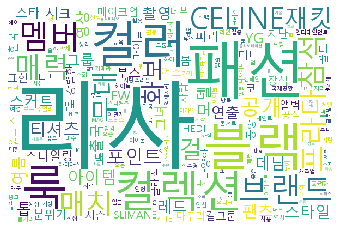

In [32]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('lisa_adj_twitter.png')

In [33]:
mag_lisa.to_csv('./magazine/final/mag_lisa_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)